# Problem Statement

For most financial institutions, such as banks and multi-finance companies, their main source of income is coming from their lending activities. By engaging in this activity, it means that lenders are exposed to the potential risk, where debtors stop repaying their loans, causing losses to the lenders. To mitigate this loss, lenders are expected to appropriately choose who are qualified for a loan, at what rate, and at what amount.  


In this question, you are tasked to help the troubled lenders with this problem by creating a model that can help them make their decision. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


%matplotlib inline

from sklearn import set_config
set_config(print_changed_only=False)

import warnings
warnings.filterwarnings('ignore')

# DATA EXTRACTION

In [2]:
df = pd.read_csv('app_train.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)

In [3]:
df.shape

(61503, 23)

In [4]:
Lender=[]

for i in df.columns:
    Lender.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum())/len(df))*100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data=Lender,columns=[
    'Data Feature', 'Data Types', 'Null','Null Percentages','Unique','Unique Sample'
])

,Data Feature,Data Types,Null,Null Percentages,Unique,Unique Sample
0,LN_ID,int64,0,0.00,61503,"[165485, 411237]"
1,TARGET,int64,0,0.00,2,"[1, 0]"
2,CONTRACT_TYPE,object,0,0.00,2,"[Cash loans, Revolving loans]"
3,GENDER,object,0,0.00,2,"[M, F]"
4,NUM_CHILDREN,int64,0,0.00,10,"[7, 9]"
5,INCOME,float64,0,0.00,861,"[186750.0, 369000.0]"
6,APPROVED_CREDIT,float64,0,0.00,3562,"[1355004.0, 184081.5]"
7,ANNUITY,float64,1,0.00,9374,"[14733.0, 10332.0]"
8,PRICE,float64,62,0.10,541,"[113724.0, 432000.0]"
9,INCOME_TYPE,object,0,0.00,7,"[State servant, Working]"


## Mapping Correlation Map

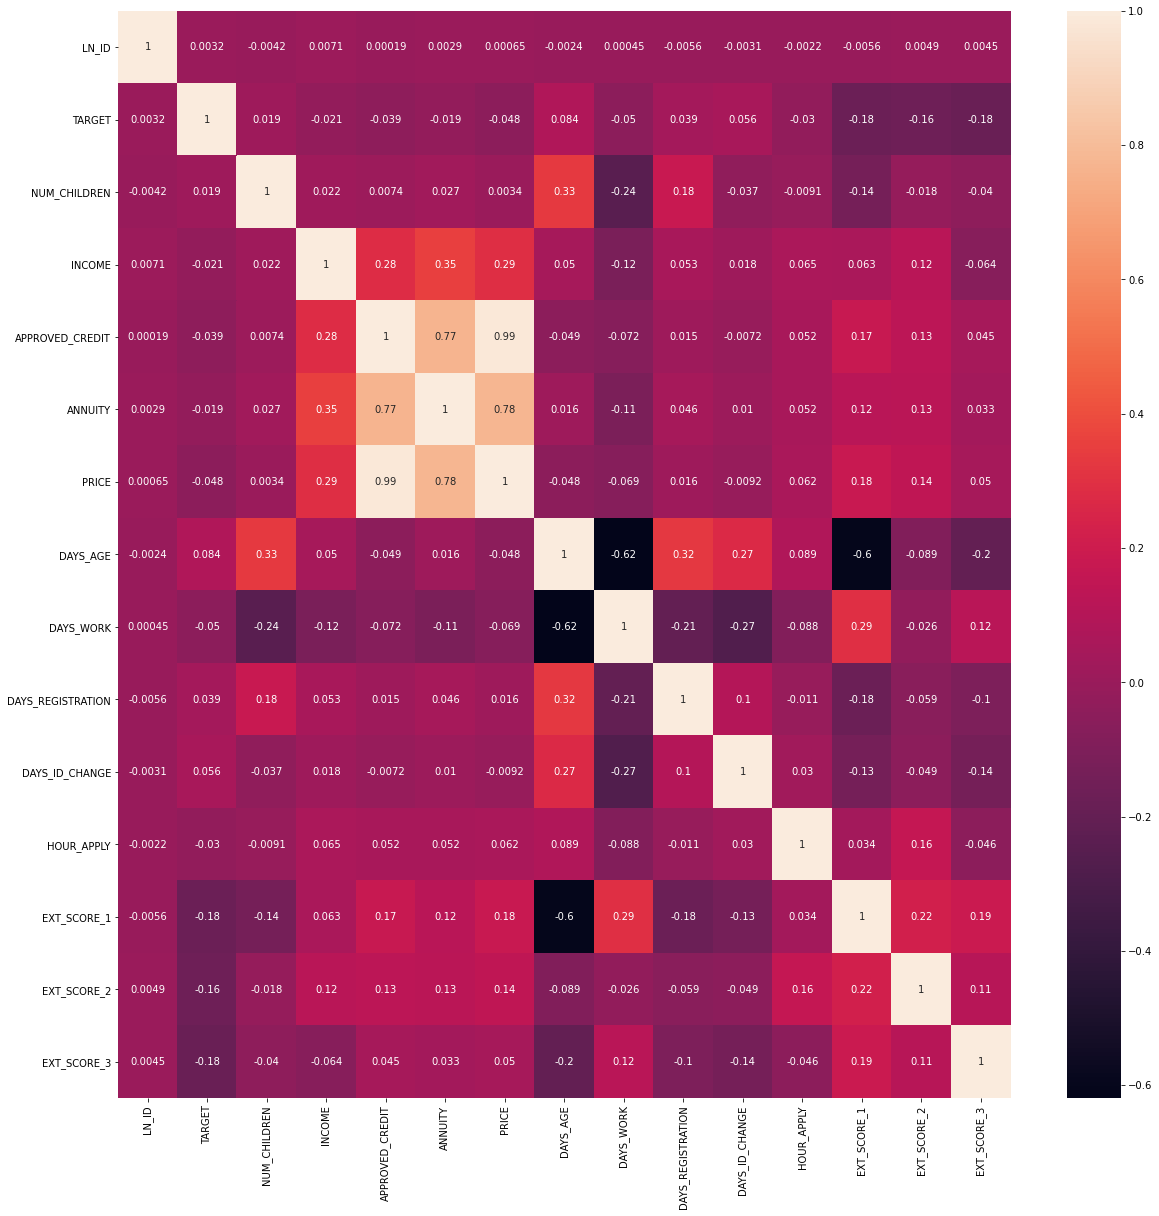

In [5]:
df.corr()

plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)

plt.show()

### Converting all character in columns into lower case

In [6]:
df.columns = [i.lower() for i in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61503 entries, 0 to 61502
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ln_id              61503 non-null  int64  
 1   target             61503 non-null  int64  
 2   contract_type      61503 non-null  object 
 3   gender             61503 non-null  object 
 4   num_children       61503 non-null  int64  
 5   income             61503 non-null  float64
 6   approved_credit    61503 non-null  float64
 7   annuity            61502 non-null  float64
 8   price              61441 non-null  float64
 9   income_type        61503 non-null  object 
 10  education          61503 non-null  object 
 11  family_status      61503 non-null  object 
 12  housing_type       61503 non-null  object 
 13  days_age           61503 non-null  int64  
 14  days_work          61503 non-null  int64  
 15  days_registration  61503 non-null  float64
 16  days_id_change     615

## Label Encoding all object data type

In [7]:
le = LabelEncoder()

cat_cols = [i for i in df.columns if df[i].dtype == 'object']

for col_name in cat_cols:
    col_name_encoded = col_name + '_encoded'
    df[col_name_encoded] = le.fit_transform(df[col_name])
    df = df.drop(columns=[col_name])
    
df.head()

,ln_id,target,num_children,income,approved_credit,annuity,price,days_age,days_work,days_registration,...,ext_score_2,ext_score_3,contract_type_encoded,gender_encoded,income_type_encoded,education_encoded,family_status_encoded,housing_type_encoded,weekdays_apply_encoded,organization_type_encoded
0,333538,0,1,67500.0,202500.0,10125.0,202500.0,-11539,-921,-119.0,...,0.608276,NaN,1,0,6,4,1,5,5,5
1,406644,0,1,202500.0,976711.5,49869.0,873000.0,-15743,-4482,-1797.0,...,0.684298,NaN,0,0,1,4,1,1,5,34
2,259130,0,0,180000.0,407520.0,25060.5,360000.0,-20775,365243,-8737.0,...,0.580687,0.749022,0,0,2,4,1,1,4,33
3,411997,0,0,225000.0,808650.0,26086.5,675000.0,-20659,-10455,-4998.0,...,0.623740,0.710674,0,1,3,1,1,1,6,8
4,241559,0,0,135000.0,180000.0,9000.0,180000.0,-9013,-1190,-3524.0,...,0.492994,0.085595,1,1,1,4,3,1,3,7


In [8]:
Lender=[]

for i in df.columns:
    Lender.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum())/len(df))*100).round(2),
        df[i].nunique()
    ])
    
pd.DataFrame(data=Lender,columns=[
    'Data Feature', 'Data Types', 'Null','Null Percentages','Unique'])

,Data Feature,Data Types,Null,Null Percentages,Unique
0,ln_id,int64,0,0.00,61503
1,target,int64,0,0.00,2
2,num_children,int64,0,0.00,10
3,income,float64,0,0.00,861
4,approved_credit,float64,0,0.00,3562
5,annuity,float64,1,0.00,9374
6,price,float64,62,0.10,541
7,days_age,int64,0,0.00,16257
8,days_work,int64,0,0.00,8524
9,days_registration,float64,0,0.00,13153


In [9]:
df.isna().sum()

ln_id                            0
target                           0
num_children                     0
income                           0
approved_credit                  0
annuity                          1
price                           62
days_age                         0
days_work                        0
days_registration                0
days_id_change                   0
hour_apply                       0
ext_score_1                  34845
ext_score_2                    134
ext_score_3                  12239
contract_type_encoded            0
gender_encoded                   0
income_type_encoded              0
education_encoded                0
family_status_encoded            0
housing_type_encoded             0
weekdays_apply_encoded           0
organization_type_encoded        0
dtype: int64

In [10]:
df.dropna(inplace=True)

df.isna().sum()

ln_id                        0
target                       0
num_children                 0
income                       0
approved_credit              0
annuity                      0
price                        0
days_age                     0
days_work                    0
days_registration            0
days_id_change               0
hour_apply                   0
ext_score_1                  0
ext_score_2                  0
ext_score_3                  0
contract_type_encoded        0
gender_encoded               0
income_type_encoded          0
education_encoded            0
family_status_encoded        0
housing_type_encoded         0
weekdays_apply_encoded       0
organization_type_encoded    0
dtype: int64

## Checking target columns

In [11]:
df["target"].value_counts()

pd.crosstab(index=df['target'],columns='count',normalize=True)*100

col_0,count
target,
0,92.716508
1,7.283492


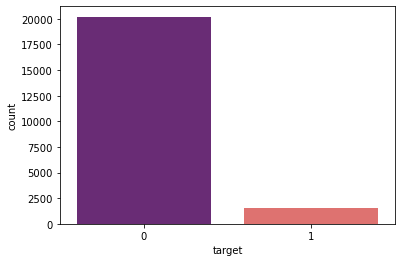

In [12]:
ax = sns.countplot(x=df['target'], data=df, palette='magma')

plt.show()

##### The target column is imbalanced, so it is needed to be handled properly. In this case, random oversampling will be applied

# Target Engineering

## Splitting Data

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score,roc_auc_score, recall_score, precision_score, accuracy_score

from sklearn.utils import resample

In [14]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size = .8, random_state=42)

In [15]:
X_train.shape

(17431, 22)

In [16]:
X_test.shape

(4358, 22)

In [17]:
df_train = pd.concat([X_train, y_train], axis=1)

df_train['target'].value_counts()

0    16161
1     1270
Name: target, dtype: int64

In [18]:
non_troubledlender = df_train[df_train['target'] == 0] ##  Majority class
troubledlender = df_train[df_train['target'] == 1] ##  Minority class

## Handling Imbalanced Data

### Random Oversampling 

In [19]:
troubledlender_oversample = resample(troubledlender, ## Minority
                           replace=True,
                           n_samples = len(non_troubledlender), ## Sum of Majority class
                           random_state = 42)

df_OverSampled = pd.concat([non_troubledlender, troubledlender_oversample])

df_OverSampled['target'].value_counts()

1    16161
0    16161
Name: target, dtype: int64

In [20]:
X_train_OverSampled = df_OverSampled.drop(columns=['target'])
y_train_OverSampled = df_OverSampled['target']

# MODELING

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## KNN - Classifier

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      4041
           1       0.08      0.22      0.12       317

    accuracy                           0.76      4358
   macro avg       0.50      0.51      0.49      4358
weighted avg       0.87      0.76      0.81      4358



acc score:  0.7574575493345571
recall score:  0.22082018927444794
precision score:  0.07954545454545454
f1 score:  0.11695906432748536


train accuracy KNN base:  0.8678790660317824
test accuracy KNN base:  1.0


       Pred 1  Pred 0
Akt 1      70     247
Akt 0     810    3231


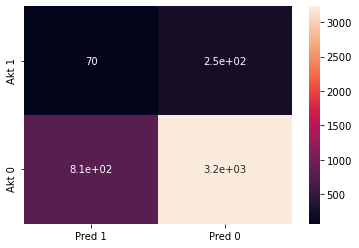

In [22]:
KNN = KNeighborsClassifier()

KNN.fit(X_train_OverSampled, y_train_OverSampled)

KNN_predict = KNN.predict(X_test)

print(classification_report(y_test, KNN_predict))

acc_base_KNN = accuracy_score(y_test, KNN_predict)
recall_base_KNN = recall_score(y_test, KNN_predict)
precision_base_KNN = precision_score(y_test, KNN_predict)
f1_base_KNN = f1_score(y_test, KNN_predict)


print('\n\nacc score: ', acc_base_KNN)
print('recall score: ', recall_base_KNN)
print('precision score: ', precision_base_KNN)
print('f1 score: ', f1_base_KNN)

print('\n\ntrain accuracy KNN base: ', KNN.score(X_train, y_train))
print('test accuracy KNN base: ', KNN.score(X_test, KNN_predict))
print()
print()

KNN_CM = confusion_matrix(y_test, KNN_predict, labels=[1 , 0])
print(pd.DataFrame(data=KNN_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"]))

KNN_DF = pd.DataFrame(data=KNN_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
sns.heatmap(KNN_DF, annot=True)
plt.show()

## Logistic Regression

              precision    recall  f1-score   support

           0       0.94      0.59      0.72      4041
           1       0.09      0.53      0.16       317

    accuracy                           0.59      4358
   macro avg       0.52      0.56      0.44      4358
weighted avg       0.88      0.59      0.68      4358



acc score:  0.5851307939421753
recall score:  0.5331230283911672
precision score:  0.09240021869874249
f1 score:  0.15750232991612304


train accuracy LogReg base:  0.5915323274625667
test accuracy LogReg base:  1.0


       Pred 1  Pred 0
Akt 1     169     148
Akt 0    1660    2381


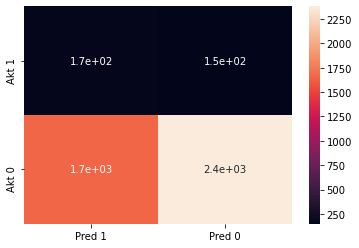

In [23]:
LogReg = LogisticRegression()

LogReg.fit(X_train_OverSampled, y_train_OverSampled)

LogReg_predict = LogReg.predict(X_test)

print(classification_report(y_test, LogReg_predict))

acc_base_LogReg = accuracy_score(y_test, LogReg_predict)
recall_base_LogReg = recall_score(y_test, LogReg_predict)
precision_base_LogReg= precision_score(y_test, LogReg_predict)
f1_base_LogReg = f1_score(y_test, LogReg_predict)


print('\n\nacc score: ', acc_base_LogReg)
print('recall score: ', recall_base_LogReg)
print('precision score: ', precision_base_LogReg)
print('f1 score: ', f1_base_LogReg)

print('\n\ntrain accuracy LogReg base: ', LogReg.score(X_train, y_train))
print('test accuracy LogReg base: ', LogReg.score(X_test, LogReg_predict))
print()
print()

LogReg_CM = confusion_matrix(y_test, LogReg_predict, labels=[1 , 0])
print(pd.DataFrame(data=LogReg_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"]))

LogReg_DF = pd.DataFrame(data=LogReg_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
sns.heatmap(LogReg_DF, annot=True)
plt.show()

## Decission Tree Classifier

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4041
           1       0.10      0.10      0.10       317

    accuracy                           0.87      4358
   macro avg       0.51      0.51      0.51      4358
weighted avg       0.87      0.87      0.87      4358



acc score:  0.869894446994034
recall score:  0.09779179810725552
precision score:  0.09935897435897435
f1 score:  0.0985691573926868


train accuracy DT base:  1.0
test accuracy DT base:  1.0


       Pred 1  Pred 0
Akt 1      31     286
Akt 0     281    3760


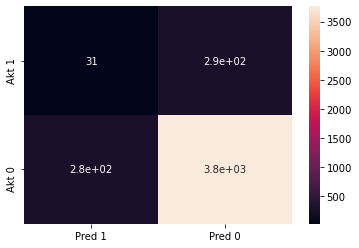

In [24]:
DT = DecisionTreeClassifier()

DT.fit(X_train_OverSampled, y_train_OverSampled)

DT_predict = DT.predict(X_test)

print(classification_report(y_test, DT_predict))

acc_base_DT = accuracy_score(y_test, DT_predict)
recall_base_DT = recall_score(y_test, DT_predict)
precision_base_DT= precision_score(y_test, DT_predict)
f1_base_DT = f1_score(y_test, DT_predict)


print('\n\nacc score: ', acc_base_DT)
print('recall score: ', recall_base_DT)
print('precision score: ', precision_base_DT)
print('f1 score: ', f1_base_DT)

print('\n\ntrain accuracy DT base: ', DT.score(X_train, y_train))
print('test accuracy DT base: ', DT.score(X_test, DT_predict))
print()
print()

DT_CM = confusion_matrix(y_test, DT_predict, labels=[1 , 0])
print(pd.DataFrame(data=DT_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"]))

DT_DF = pd.DataFrame(data=DT_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
sns.heatmap(DT_DF, annot=True)
plt.show()

### Random Forest Classifier

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4041
           1       0.44      0.01      0.02       317

    accuracy                           0.93      4358
   macro avg       0.69      0.51      0.49      4358
weighted avg       0.89      0.93      0.89      4358



acc score:  0.927030748049564
recall score:  0.012618296529968454
precision score:  0.4444444444444444
f1 score:  0.024539877300613498


train accuracy RF base:  1.0
test accuracy RF base:  1.0


       Pred 1  Pred 0
Akt 1       4     313
Akt 0       5    4036


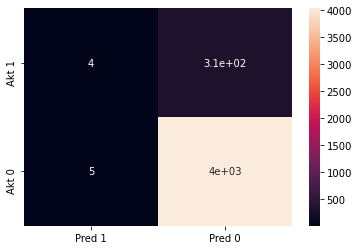

In [25]:
RF = RandomForestClassifier()

RF.fit(X_train_OverSampled, y_train_OverSampled)

RF_predict = RF.predict(X_test)

print(classification_report(y_test, RF_predict))

acc_base_RF = accuracy_score(y_test, RF_predict)
recall_base_RF = recall_score(y_test, RF_predict)
precision_base_RF = precision_score(y_test, RF_predict)
f1_base_RF = f1_score(y_test, RF_predict)


print('\n\nacc score: ', acc_base_RF)
print('recall score: ', recall_base_RF)
print('precision score: ', precision_base_RF)
print('f1 score: ', f1_base_RF)

print('\n\ntrain accuracy RF base: ', RF.score(X_train, y_train))
print('test accuracy RF base: ', RF.score(X_test, RF_predict))
print()
print()

RF_CM = confusion_matrix(y_test, RF_predict, labels=[1 , 0])
print(pd.DataFrame(data=RF_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"]))

RF_DF = pd.DataFrame(data=RF_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
sns.heatmap(RF_DF, annot=True)
plt.show()

In [26]:
data = {
    "K Nearest Neighbors" : [acc_base_KNN, precision_base_KNN, recall_base_KNN, f1_base_KNN,(KNN.score(X_train, y_train))],
    "Logistic Regression" : [acc_base_LogReg, precision_base_LogReg, recall_base_LogReg, f1_base_LogReg,LogReg.score(X_train, y_train)],
    "Decission Tree" : [acc_base_DT, precision_base_DT, recall_base_DT, f1_base_DT,DT.score(X_train, y_train)],
    "Random Forest"  : [acc_base_RF, precision_base_RF, recall_base_RF, f1_base_RF,RF.score(X_train, y_train)]
}

pd.DataFrame(data=data, index=['Accuracy', 'Precision', 'Recall', 'F1 Score','Train Model Accuracy']).T

,Accuracy,Precision,Recall,F1 Score,Train Model Accuracy
K Nearest Neighbors,0.757458,0.079545,0.220820,0.116959,0.867879
Logistic Regression,0.585131,0.092400,0.533123,0.157502,0.591532
Decission Tree,0.869894,0.099359,0.097792,0.098569,1.000000
Random Forest,0.927031,0.444444,0.012618,0.024540,1.000000


**Since we want to focus on minimizing False Positive, so Precision is used as our main metric. According to our models, Random Forest Base Model is used, for the reason having highest precision score.**

# EXPORT MODEL

In [27]:
import joblib

joblib.dump(RF,'modelRF')

['modelRF']

# Ranking Applicant

### Testing with app_test

In [28]:
app_test = pd.read_csv('app_test.csv')
app_test = app_test.drop(['Unnamed: 0'], axis=1)
app_test = app_test.dropna()
print(app_test.shape)

(5286, 23)


### Export Model

In [29]:
export_model = joblib.load(open('modelRF', 'rb'))

### Label Encoding app_test dataset

In [30]:
test = LabelEncoder()

cat_cols = [i for i in app_test.columns if app_test[i].dtype == 'object']

for col_name in cat_cols:
    col_name_encoded = col_name + '_encoded'
    app_test[col_name_encoded] = test.fit_transform(app_test[col_name])
    app_test = app_test.drop(columns=[col_name])
    
app_test.head()

,LN_ID,TARGET,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,...,EXT_SCORE_2,EXT_SCORE_3,CONTRACT_TYPE_encoded,GENDER_encoded,INCOME_TYPE_encoded,EDUCATION_encoded,FAMILY_STATUS_encoded,HOUSING_TYPE_encoded,WEEKDAYS_APPLY_encoded,ORGANIZATION_TYPE_encoded
2,180205,0,1,90000.0,247500.0,8887.5,247500.0,-18384,-2826,-8226,...,0.686312,0.758393,0,0,3,4,1,1,2,41
3,357381,0,2,112500.0,506889.0,24781.5,418500.0,-12170,-926,-916,...,0.266520,0.058826,0,1,3,4,1,1,4,33
4,271229,0,0,216000.0,450000.0,21888.0,450000.0,-10790,-577,-4640,...,0.610483,0.392774,0,1,3,2,1,1,1,5
5,374711,0,0,58500.0,135000.0,7321.5,135000.0,-10942,-3100,-3232,...,0.067371,0.199771,0,0,3,4,3,5,5,39
8,146009,0,0,112500.0,665892.0,19210.5,477000.0,-20625,365243,-741,...,0.673492,0.510090,0,0,1,4,1,1,1,32


## SPLITING DATA

In [31]:
X_test = app_test.drop(columns=['TARGET'])
y_test = app_test['TARGET']

Prediction_proba = export_model.predict_proba(X_test)

# Final Result

In [38]:
Ranking = pd.DataFrame()

Ranking['LN_ID'] = app_test['LN_ID']
Ranking['Probability'] = [i[1] for i in Prediction_proba]

Ranking = Ranking.sort_values('Probability',ascending=False).reset_index(drop=True)
print(Ranking)

       LN_ID  Probability
0     217305         0.64
1     164492         0.57
2     190097         0.55
3     393398         0.54
4     326641         0.54
...      ...          ...
5281  110115         0.00
5282  229490         0.00
5283  142630         0.00
5284  365489         0.00
5285  178303         0.00

[5286 rows x 2 columns]


## ROC / AUC SCORE

No Skill Model: ROC AUC=0.500
Trained Model: ROC AUC=0.494


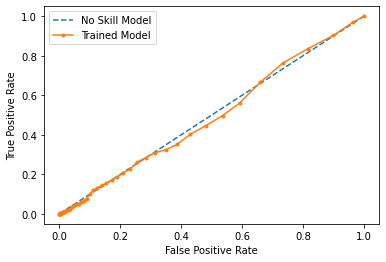

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

# no skill model
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, Ranking['Probability'])

# summarize scores
print('No Skill Model: ROC AUC=%.3f' % (ns_auc))
print('Trained Model: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, Ranking['Probability'])

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill Model')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Trained Model')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend and plot
plt.legend()
plt.show()